In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/tot_data.csv', parse_dates=['date']).drop('Unnamed: 0', axis=1)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df['arima_spread'] = df['arima_spread'].resample('T').ffill()
df['arima_close'] = df['arima_close'].resample('T').ffill()
df = df.reset_index()


/var/folders/d4/kmvfs86566qdvphh5mdyn9lw0000gn/T/ipykernel_13267/297907568.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['arima_spread'] = df['arima_spread'].resample('T').ffill()
/var/folders/d4/kmvfs86566qdvphh5mdyn9lw0000gn/T/ipykernel_13267/297907568.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['arima_close'] = df['arima_close'].resample('T').ffill()


In [3]:
df.columns

Index(['date', 's1_spread', 's1_close', 's2_close', 's2_spread',
       's3_tuned_spread', 's3_tuned_close', 'arima_close', 'arima_spread',
       'boosting_all_spread', 'boosting_all_close'],
      dtype='object')

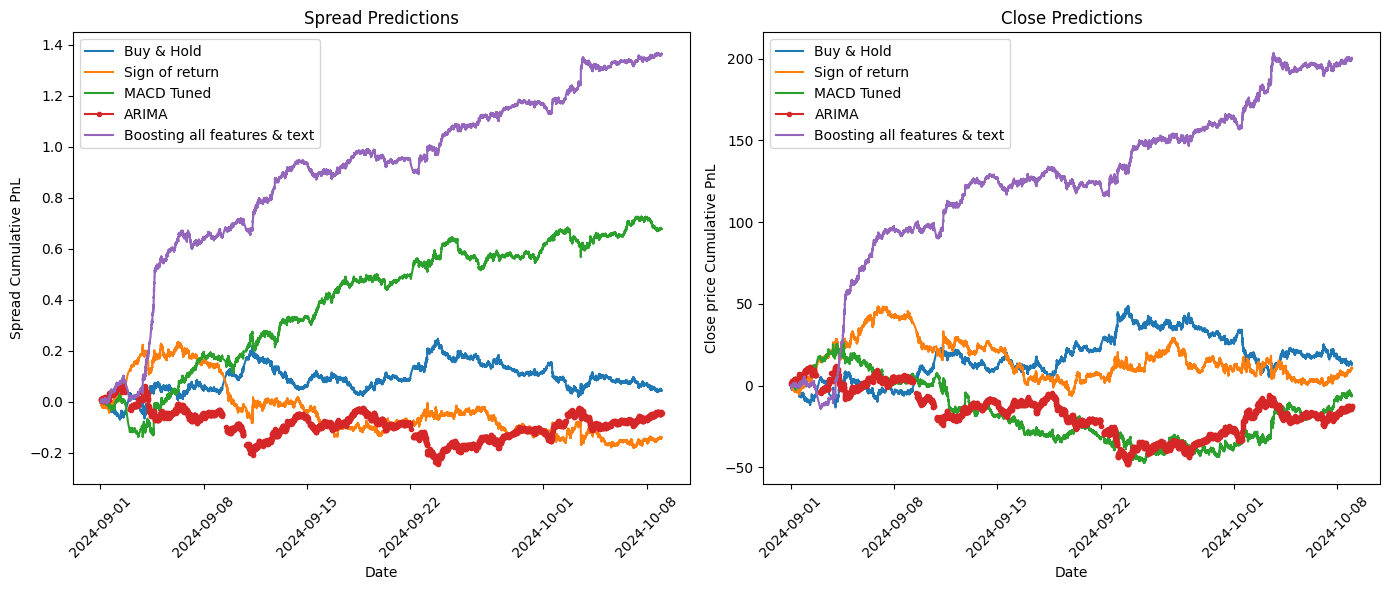

In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(df['date'], df['s1_spread'], label='Buy & Hold')
plt.plot(df['date'], df['s2_spread'], label='Sign of return')
plt.plot(df['date'], df['s3_tuned_spread'], label='MACD Tuned')
plt.plot(df['date'], df['arima_spread'], label='ARIMA', marker='.')
plt.plot(df['date'], df['boosting_all_spread'], label='Boosting all features & text')
plt.xlabel('Date')
plt.ylabel('Spread Cumulative PnL')
plt.title('Spread Predictions')
plt.legend()
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.plot(df['date'], df['s1_close'], label='Buy & Hold')
plt.plot(df['date'], df['s2_close'], label='Sign of return')
plt.plot(df['date'], df['s3_tuned_close'], label='MACD Tuned')
plt.plot(df['date'], df['arima_close'], label='ARIMA',  marker='.')
plt.plot(df['date'], df['boosting_all_close'], label='Boosting all features & text')
plt.xlabel('Date')
plt.ylabel('Close price Cumulative PnL')
plt.title('Close Predictions')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('final_results.png', dpi=300)

plt.show()
